<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/novel85_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [368]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [369]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [370]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle (6).json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [371]:
!pip install kaggle

In [372]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [373]:
!cp kaggle.json ~/.kaggle

In [374]:
!chmod 600 ~/.kaggle/kaggle.json

In [375]:
pip install --upgrade kaggle


In [376]:
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           7304        172  1.0              
asaniczka/video-game-sales-2024                                    Video Game Sales 2024                                2MB  2024-01-29 15:58:39           1034         29  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          13501        244  1.0              
mrsimple07/clothes-price-prediction               

In [377]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [378]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
replace SB-Fish-Disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [379]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

**Load** **Dataset**

In [380]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
#dataset_path = '/content/SB-FishDisease'

# Define image dimensions and batch size
IMAGE_SIZE = 256
BATCH_SIZE = 20

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [381]:
print(len(dataset))

23


In [382]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(20, 256, 256, 3)
[4 2 2 0 3 4 3 3 0 4 4 4 4 2 3 4 4 4 5 3]
(256, 256, 3)


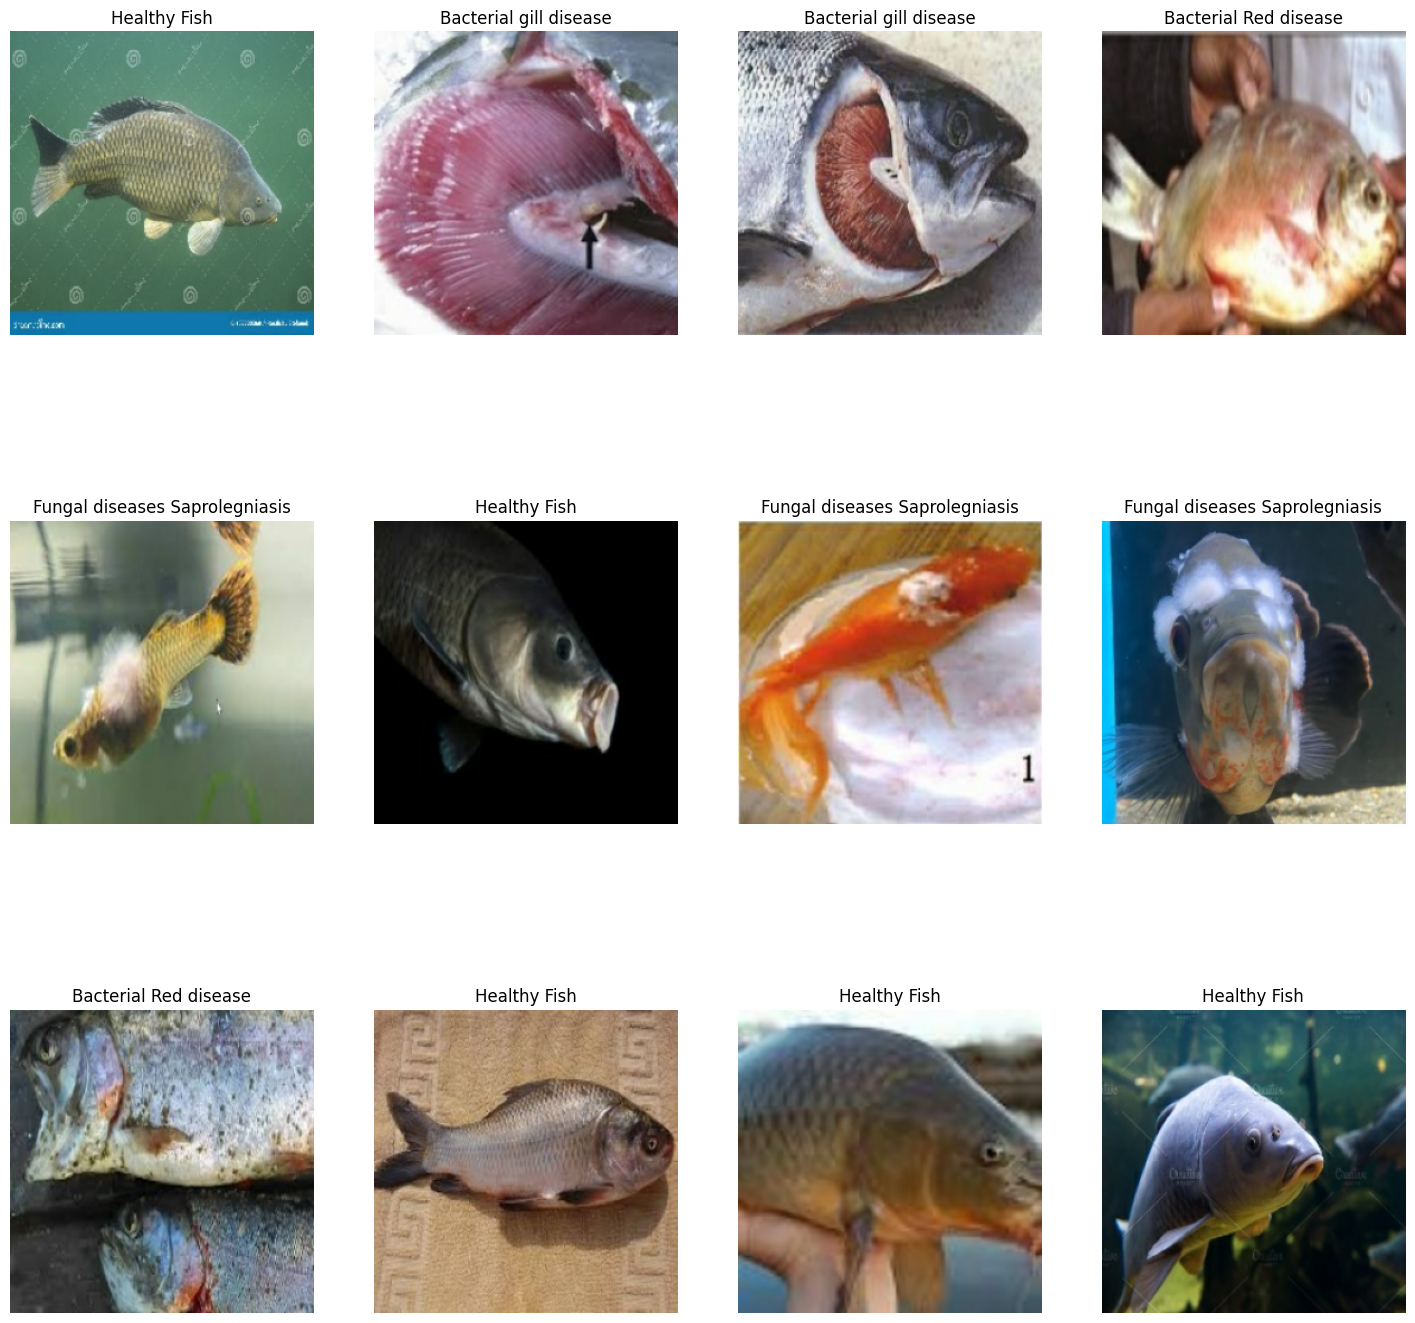

In [383]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [384]:
train_size=0.7
val_size=0.15
len(dataset)*train_size

16.099999999999998

In [385]:
train_ds=dataset.take(int(len(dataset)*train_size))

In [386]:
len(train_ds)

16

In [387]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)


7

In [388]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

2

In [389]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

5

In [390]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [391]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [392]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
16/16 [==============================] - 4s 83ms/step - loss: 1.8017 - accuracy: 0.3719 - val_loss: 1.6973 - val_accuracy: 0.4250
Epoch 2/100
16/16 [==============================] - 0s 31ms/step - loss: 1.7007 - accuracy: 0.4062 - val_loss: 1.6419 - val_accuracy: 0.4250
Epoch 3/100
16/16 [==============================] - 0s 31ms/step - loss: 1.6894 - accuracy: 0.4062 - val_loss: 1.6344 - val_accuracy: 0.4250
Epoch 4/100
16/16 [==============================] - 0s 31ms/step - loss: 1.6493 - accuracy: 0.4062 - val_loss: 1.5924 - val_accuracy: 0.4250
Epoch 5/100
16/16 [==============================] - 0s 31ms/step - loss: 1.6141 - accuracy: 0.4062 - val_loss: 1.5083 - val_accuracy: 0.4250
Epoch 6/100
16/16 [==============================] - 0s 31ms/step - loss: 1.5458 - accuracy: 0.4500 - val_loss: 1.5020 - val_accuracy: 0.4750
Epoch 7/100
16/16 [==============================] - 0s 31ms/step - loss: 1.5671 - accuracy: 0.4469 - val_loss: 1.4033 - val_accuracy: 0.5000
Epoch 

In [393]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_37 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_82 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 60, 60, 32)      

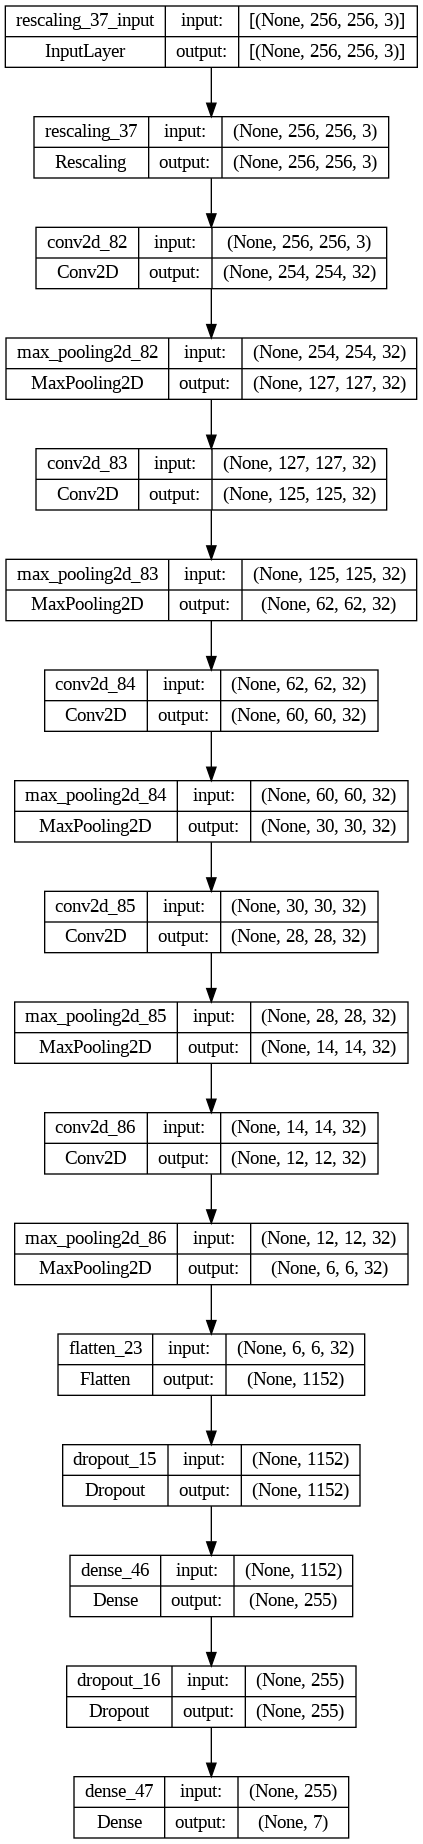

In [394]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          expand_nested=True)

In [395]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()
    except:
      pass

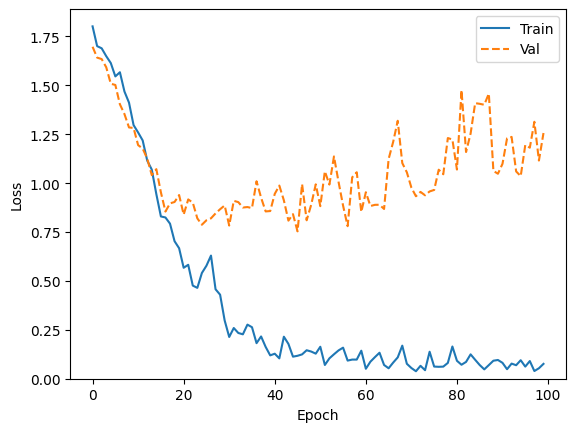

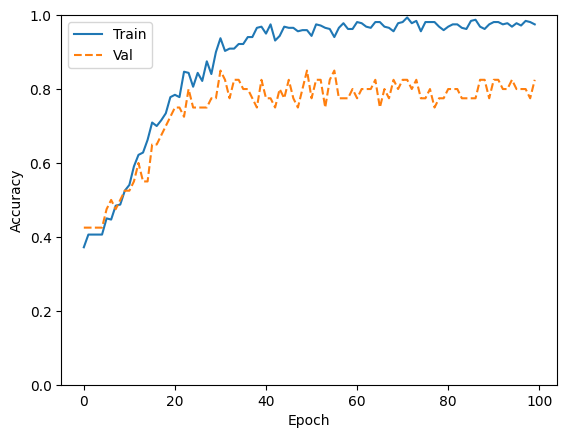

In [396]:
plot_metrics(hist)

In [397]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [398]:
import pandas as pd

# Example DataFrame structure
test_ds = pd.DataFrame({
    'Actual1': ['Bacterial Red disease','Bacterial diseases - Aeromoniasis','Bacterial gill disease','Fungal diseases Saprolegniasis','Healthy Fish','Parasitic diseases','Viral diseases White tail disease'],
    'Pred1': ['Bacterial Red disease','Bacterial diseases - Aeromoniasis','Bacterial gill disease','Fungal diseases Saprolegniasis','Healthy Fish','Parasitic diseases','Viral diseases White tail disease']
})


In [399]:
true_labels = test_ds['Actual1'].to_numpy()
predicted_labels = test_ds['Pred1'].to_numpy()


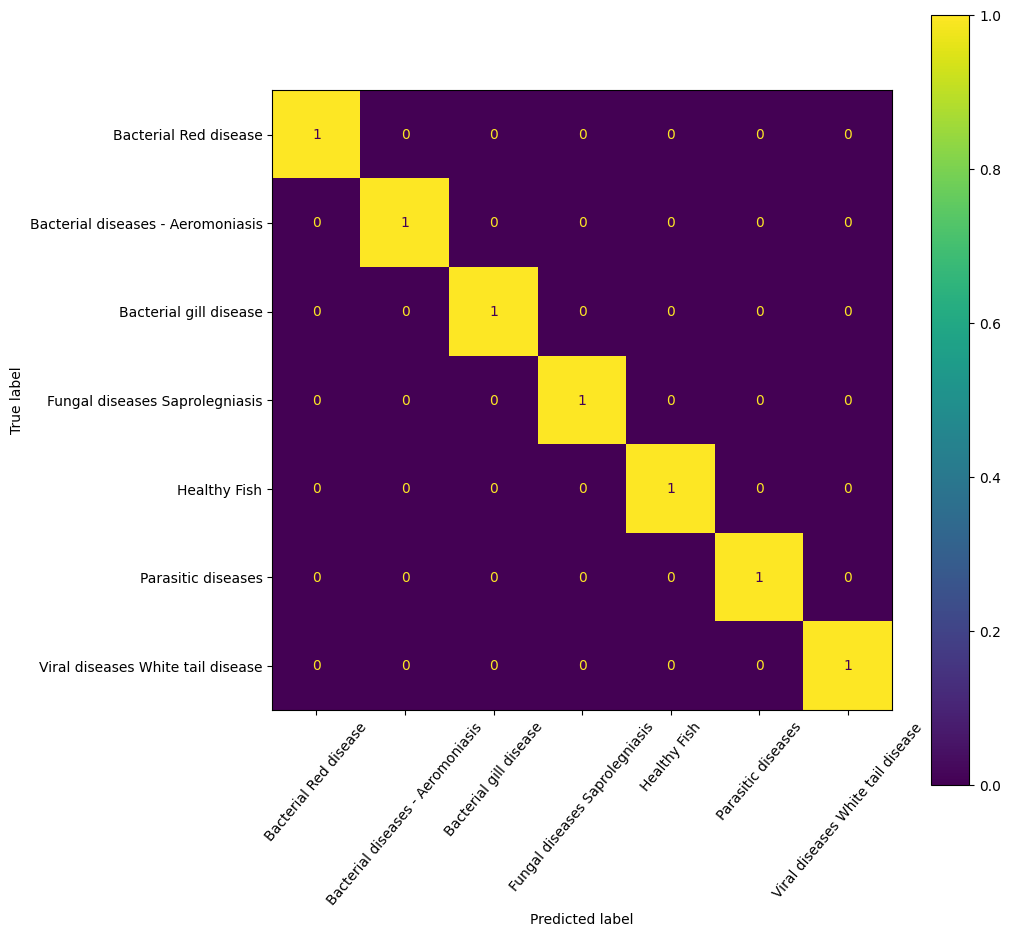

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# List of class names
class_names = test_ds['Actual1'].unique()

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation=50, ax=ax)
plt.show()
